In [101]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score,classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [102]:
iris = pd.read_csv('/content/Iris.csv')


In [103]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
iris.shape

(150, 6)

In [105]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [106]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [107]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [108]:
iris['Species'].nunique()

3

In [109]:
iris.drop('Id',axis=1,inplace=True)

In [110]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


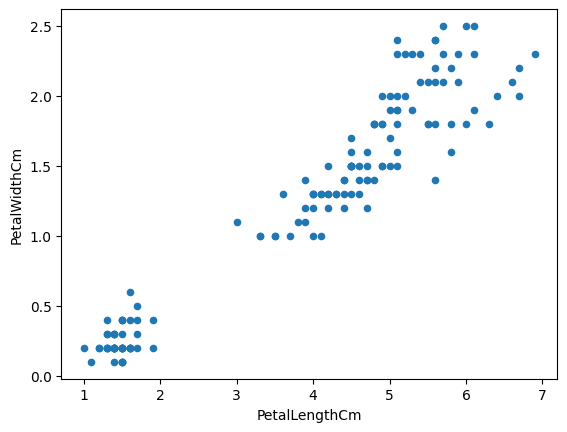

In [111]:
iris.plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm')
plt.show()

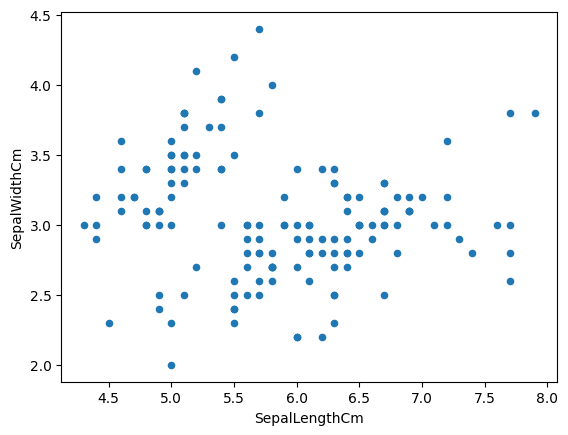

In [112]:
iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')
plt.show()

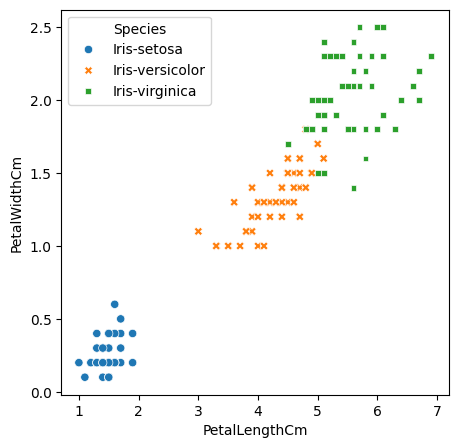

In [113]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", hue='Species',style='Species'
)
plt.show()

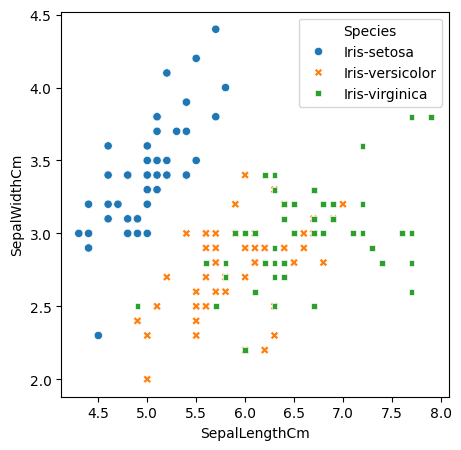

In [114]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue='Species',style='Species'
)
plt.show()

In [115]:
iris_categorical = iris.select_dtypes(include='object')
iris_categorical.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [116]:
iris_numerical = iris.select_dtypes(exclude='object')
iris_numerical.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
iris_numerical.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

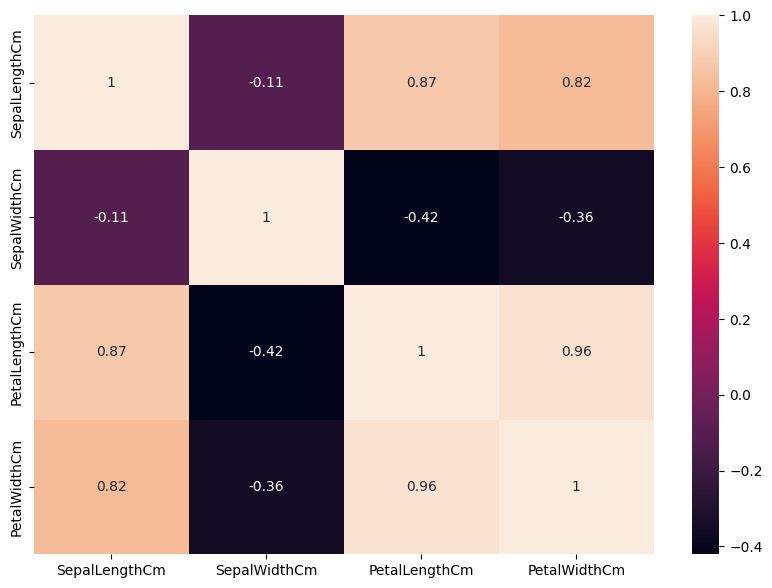

In [118]:
plt.figure(figsize=(10,7))
sns.heatmap(iris_numerical.corr(), annot = True)

In [119]:


le = LabelEncoder()
iris['species_encoded'] = le.fit_transform(iris['Species'])


In [120]:
iris.drop('Species',axis=1,inplace=True)

In [121]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [122]:
X_train = iris.drop('species_encoded',axis=1)
y_train = iris['species_encoded']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [124]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [125]:
y_pred = model1.predict(X_test)

In [126]:
# prompt: classification report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [127]:
c_m=confusion_matrix(y_test, y_pred)
c_m


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [128]:

from sklearn.metrics import log_loss

y_pred_proba = model1.predict_proba(X_test)
log_loss_value = log_loss(y_test, y_pred_proba)
print("Log Loss:", log_loss_value)


Log Loss: 0.11118781847661527


In [129]:
y_test

,species_encoded
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [130]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [131]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model_dt = DecisionTreeClassifier(random_state=42)


model_dt.fit(X_train, y_train)


y_pred_dt = model_dt.predict(X_test)



In [132]:
confusion_matrix = confusion_matrix(y_test, y_pred_dt)
confusion_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [133]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [134]:

from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(random_state=42)


model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)




In [138]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [139]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [140]:

model_knn = KNeighborsClassifier(n_neighbors=5)


model_knn.fit(X_train, y_train)


y_pred_knn = model_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [141]:

from sklearn.svm import SVC


model_svm = SVC(kernel='linear', random_state=42)


model_svm.fit(X_train, y_train)


y_pred_svm = model_svm.predict(X_test)


print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

